# OPIA 
# HANDWRIITEN CHARACTER RECOGNISER 

In [ ]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from keras.datasets import mnist  --> a dataset with handwritten numerical digits
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical # Converts a class vector (integers) to binary class matrix.

import cv2

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
# Reading the dataset

address = 'D:/IBM/Opia/Dataset/Handwritten/Handwritten.csv'
data = pd.read_csv(address).astype('float32')

# Split data 
# x - Data
# y - To be Predicted Label

x = data.drop('0', axis = 1)
y = data['0'] 

In [ ]:
# Splitting the Dataset by 80-20 into training data and testing data respectively

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

# reshaping the available 1-D 784 pixels of data per image to a 2-D form of 28 x 28

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28)) 
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)  

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [ ]:
# Labelling all Alphabets with an index value

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

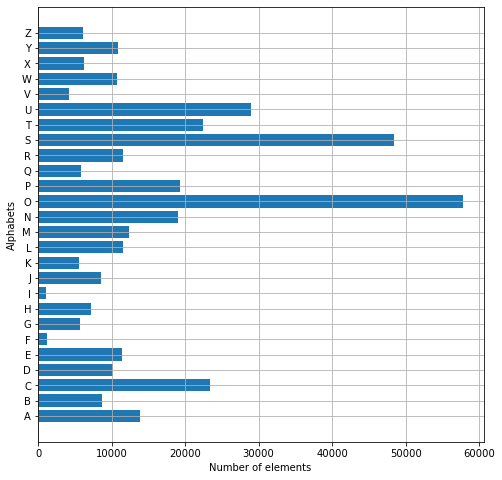

In [ ]:
# Plotting the number of available Images for each alphabet

train_yint = np.int0(y) # y: converting 'float32' to 'int64'
count = np.zeros(26, dtype='int')

# Getting the total count for each alphabet
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

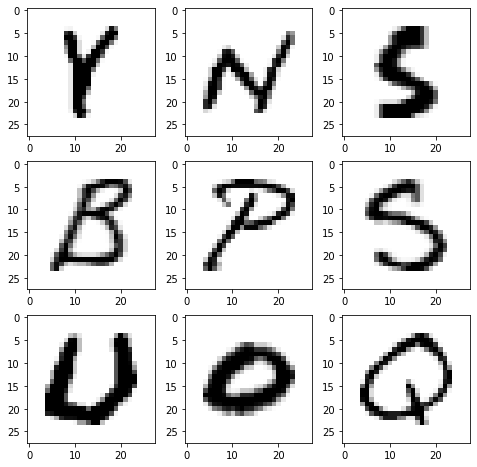

In [ ]:
# Data Shuffling --> No figurative effect on the model
# Purpose: Data visualization

shuff = shuffle(train_x[:300])
fig, ax = plt.subplots(3,3, figsize = (8,8))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
# Reshaping the two - training and testing datasets into 4-D array
# Required for CNN model

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


In [ ]:
# Applying One Hot Encoding using to_categorical() for division into proper classes

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
# CNN Model with 3 pairs of Conv2D and MaxPool2D layers each
# followed by 3 Dense layers required for Output

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))


model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=2, verbose=1, mode='auto')


history = model.fit(train_X, train_yOHE, epochs=5, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))


model.summary()
model.save(r'model_hand.h5')

Epoch 1/5
9312/9312 [==============================] - 230s 23ms/step - loss: 0.3760 - accuracy: 0.9020 - val_loss: 0.0962 - val_accuracy: 0.9740
Epoch 2/5
9312/9312 [==============================] - 215s 23ms/step - loss: 0.0757 - accuracy: 0.9792 - val_loss: 0.0630 - val_accuracy: 0.9819
Epoch 3/5
9312/9312 [==============================] - 210s 23ms/step - loss: 0.0595 - accuracy: 0.9839 - val_loss: 0.0760 - val_accuracy: 0.9798
Epoch 00003: early stopping
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
____________________________________________________

In [ ]:
# Model Summary

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.973983108997345, 0.9818633198738098, 0.9797691106796265]
The training accuracy is : [0.9533528089523315, 0.9796079993247986, 0.9834977984428406]
The validation loss is : [0.09621340036392212, 0.06296572089195251, 0.07600893080234528]
The training loss is : [0.1671358197927475, 0.07377533614635468, 0.06079881638288498]


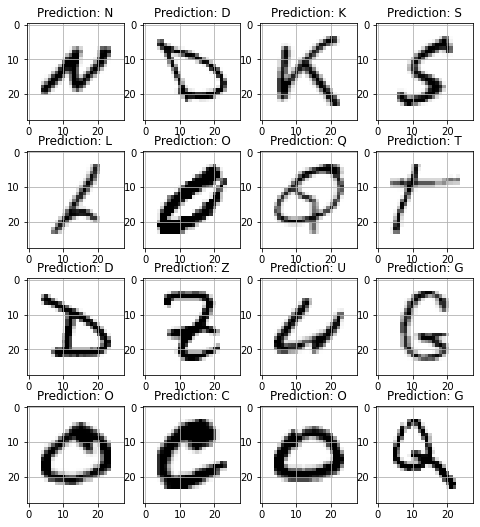

In [ ]:
# Using the Model to predict values against inputs from the testing dataset

fig, axes = plt.subplots(4,4, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    img = np.reshape(test_X[i], (1,28,28,1))
    pred = word_dict[np.argmax(model.predict(img))]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
# Predicting against external inputs

img = cv2.imread('D:/Opia/Images/D.jpg')
img_copy = img.copy()

img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

window_name = 'OPIA'

img_pred = word_dict[np.argmax(model.predict(img_final))] 

cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_SIMPLEX, 1.3, color = (255,0,30))
cv2.imshow(window_name, img)


while (1):
    k = cv2.waitKey(0)
    
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined